# Custom indicator example

In [6]:
import yfinance as yf

from mplchart.chart import Chart

from mplchart.library import get_series, calc_ema
from mplchart.primitives import Candlesticks, OHLC, Volume

from dataclasses import dataclass

In [7]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-03-18 00:00:00-04:00,44.717369,45.340716,44.714960,45.251667,104879200,0.0,0.0
2019-03-19 00:00:00-04:00,45.331089,45.485120,44.746247,44.893059,126585600,0.0,0.0
2019-03-20 00:00:00-04:00,44.820854,45.605456,44.459842,45.285358,124140800,0.0,0.0
2019-03-21 00:00:00-04:00,45.733013,47.251670,45.682470,46.953232,204136800,0.0,0.0
2019-03-22 00:00:00-04:00,47.013400,47.578987,45.915924,45.980907,169630800,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-11 00:00:00-04:00,172.940002,174.380005,172.050003,172.750000,60139500,0.0,0.0
2024-03-12 00:00:00-04:00,173.149994,174.029999,171.009995,173.229996,59825400,0.0,0.0
2024-03-13 00:00:00-04:00,172.770004,173.190002,170.759995,171.130005,52488700,0.0,0.0


In [8]:
@dataclass
class DEMA:
    """Double Exponential Moving Average"""

    period: int = 20

    same_scale = True
    # same_scale is an optional class attribute
    # to specify that the indicator can be drawn
    # on the same axes as the previous indicator

    def __call__(self, prices):
        series = get_series(prices)
        ema1 = calc_ema(series, self.period)
        ema2 = calc_ema(ema1, self.period)
        return 2 * ema1 - ema2

In [9]:
res = DEMA(20)(prices)
res.tail()

Date
2024-03-11 00:00:00-04:00    172.613383
2024-03-12 00:00:00-04:00    172.257246
2024-03-13 00:00:00-04:00    171.593588
2024-03-14 00:00:00-04:00    171.385344
2024-03-15 00:00:00-04:00    171.160587
Name: close, dtype: float64

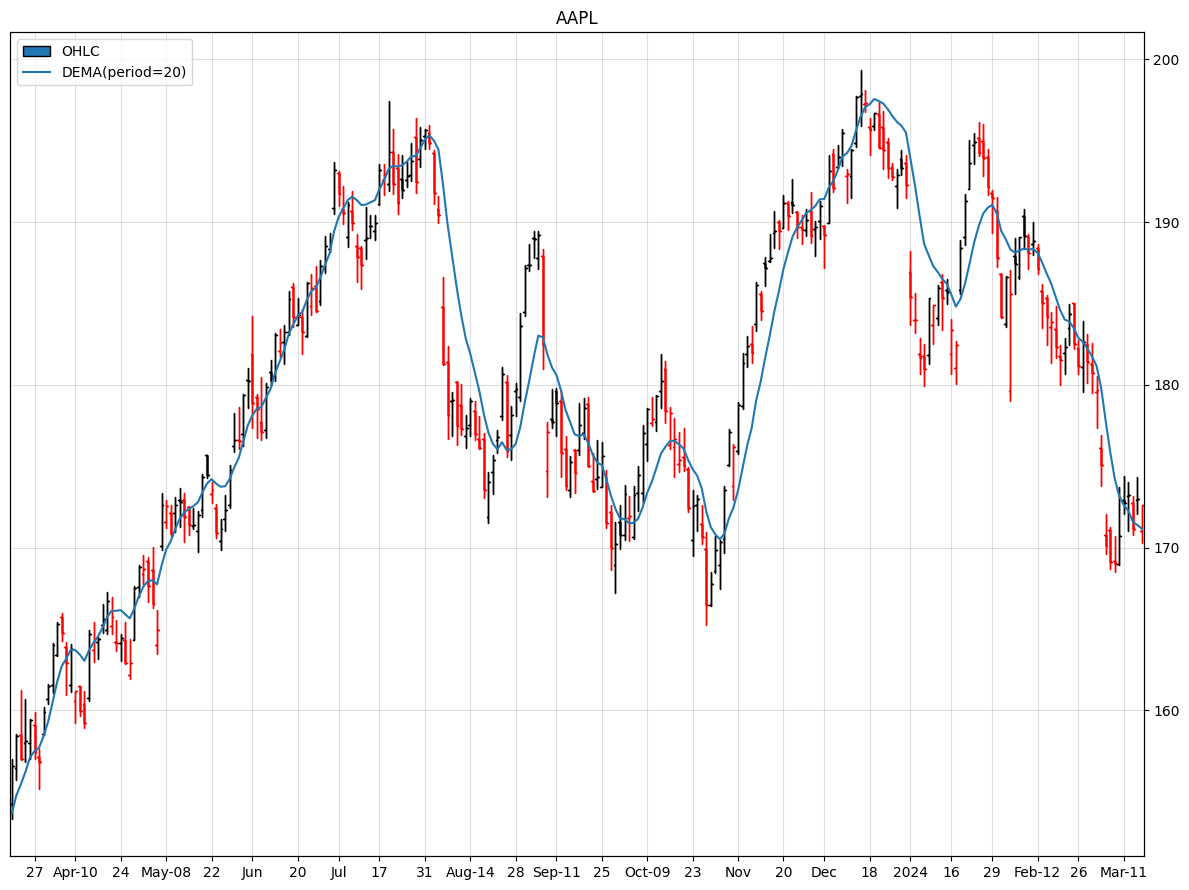

In [10]:
max_bars = 250

indicators = [
    OHLC(),
    DEMA(20),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)